In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_excel('1645792390_cep1_dataset.xlsx')

Preliminary Data Analysis

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Most patients are above 45 years. 
68% of people are male.

In [7]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

No null values in the data

In [8]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


There is 1 duplicate entry

In [9]:
df = df.drop(164)

Drop duplicate row

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
df.apply(lambda x: len(x.value_counts()))

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
bar_columns = []
hist_columns = []

In [13]:
df.apply(lambda x:hist_columns.append(x.name) if len(x.value_counts()) >=6 else bar_columns.append(x.name))

age         None
sex         None
cp          None
trestbps    None
chol        None
fbs         None
restecg     None
thalach     None
exang       None
oldpeak     None
slope       None
ca          None
thal        None
target      None
dtype: object

In [14]:
hist_columns

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
bar_columns

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
# fig = plt.figure(figsize=(20,15))
# for index,col in enumerate(Cols):
#     plt.subplot(4,3,index+1)
#     sns.barplot(x=day_reports.index, y=col, data=day_reports)

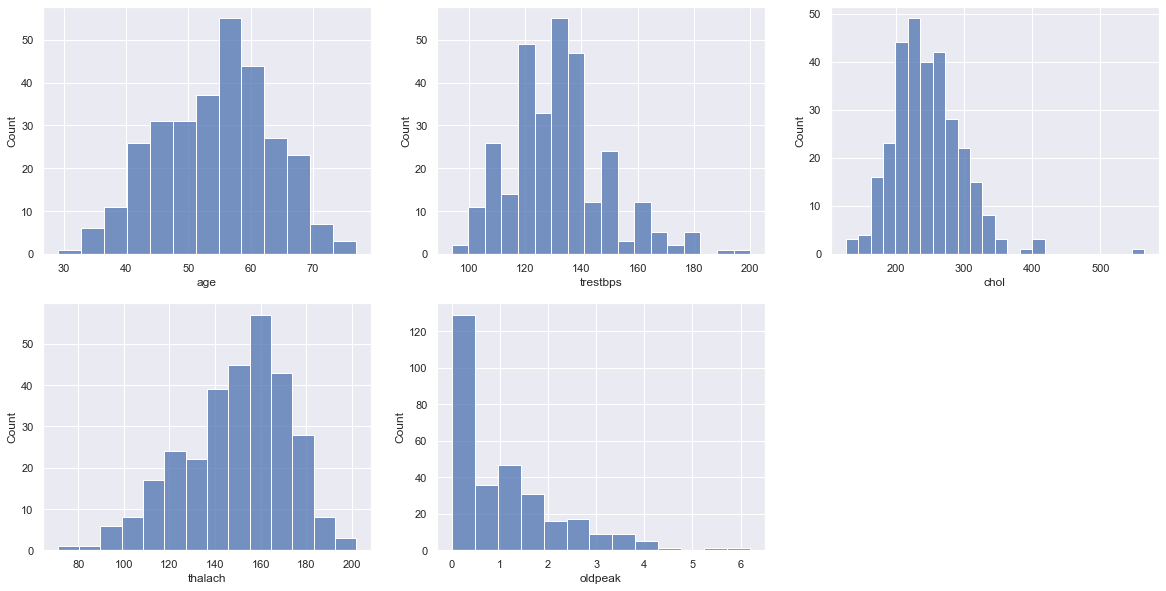

In [17]:
fig = plt.figure(figsize=(20,10))
for index,col in enumerate(hist_columns):
    plt.subplot(2,3,index+1)
    sns.histplot(df[col])

Columns Age and thalach are left skewed while columns trestbps.chol and oldpeak are right skewed

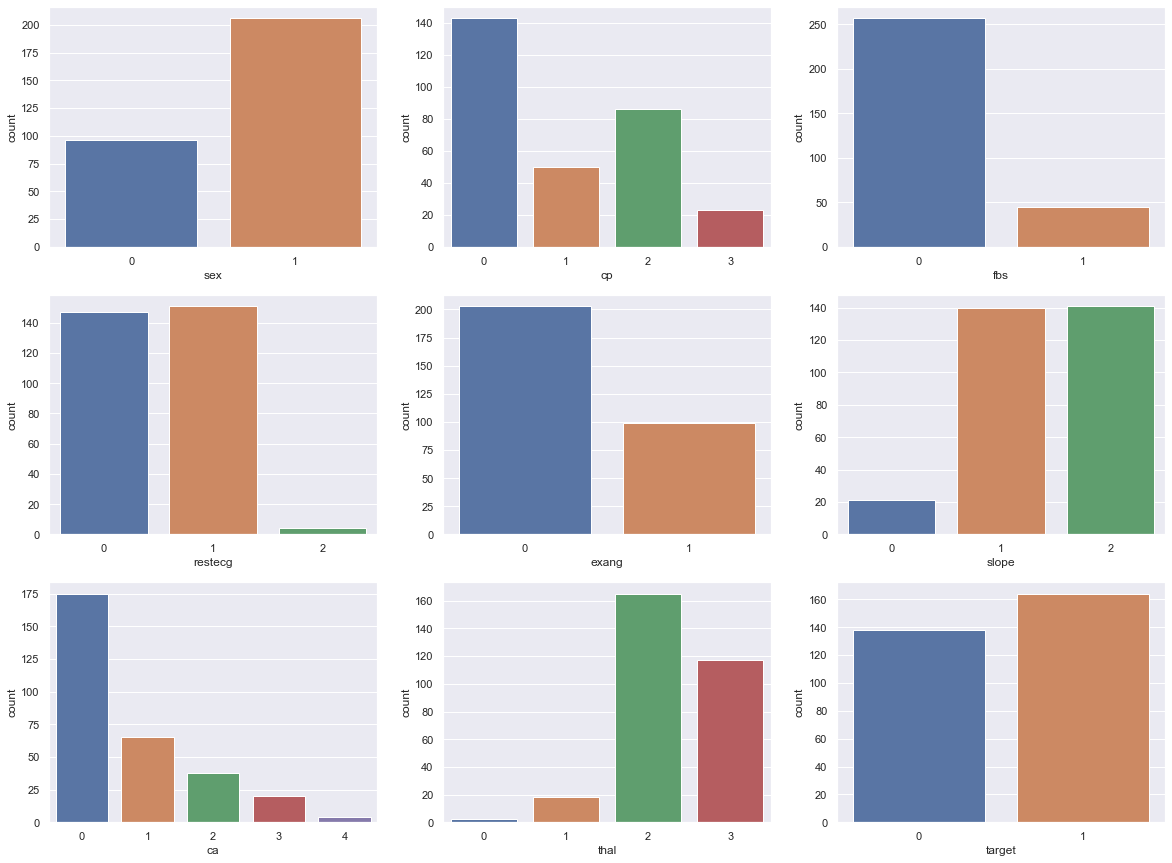

In [18]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(bar_columns):
    plt.subplot(3,3,index+1)
    sns.countplot(x = df[col])

These are the Counts of various categorical and binary features present in our data.

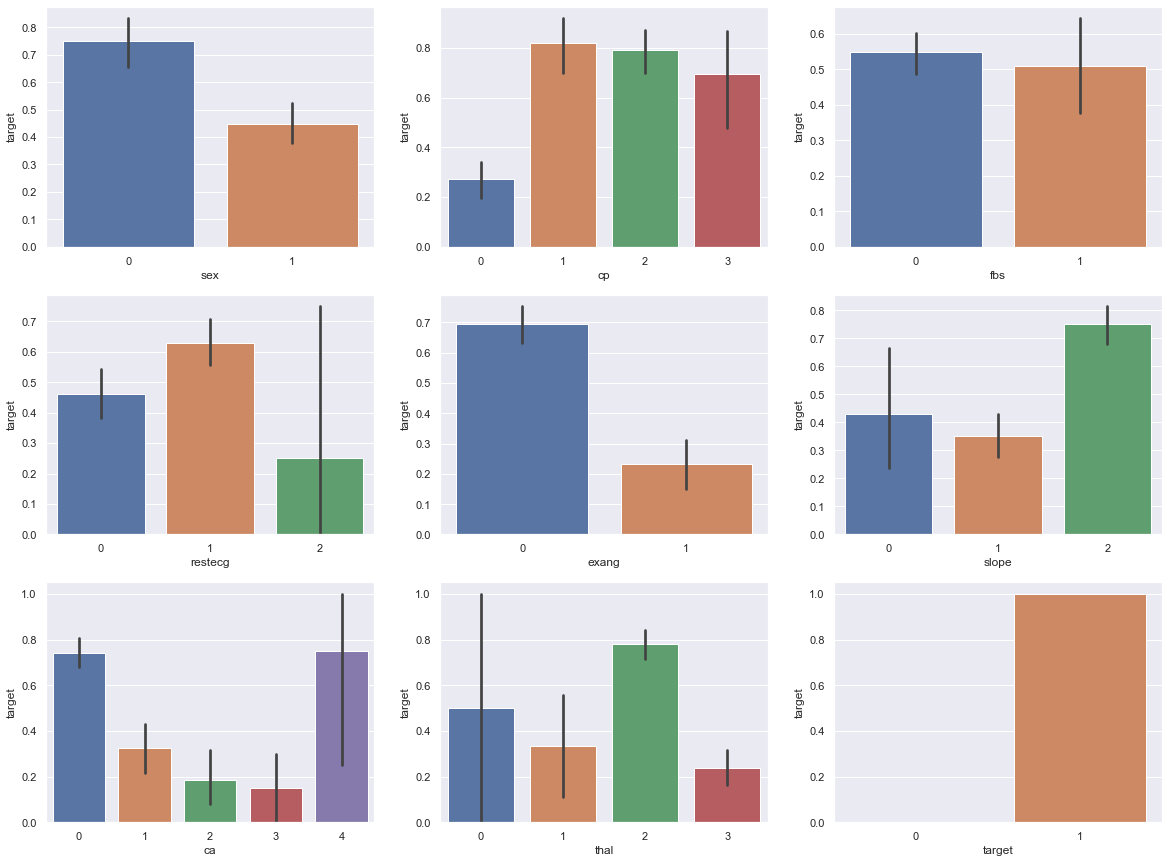

In [19]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(bar_columns):
    plt.subplot(3,3,index+1)
    sns.barplot(x = col, y = 'target', data=df)

Females tend to get heart attack at almost double the rate of Males. The chances of heart atack are only 23% if there is no chest pain and it increases substantially to around 80% if there is chest pain of type 1 or type 2. Fasting blood sugar also shows minute inverse correlation with heart attack rate. Resting electrocardiographic results show that when it is 0 the chances of heart attack are at 45%, when the result is 1 the chances are around 60% and when the result is 2 there are on average low heart attacks but there is a lot of variance. Exercise induced angina when present lowers the chances of heart attack significantly. Slope of the peak exercise has greater risk of heart attack when the value is 2. In number of major vessels the chances are around 70% for 0 and 4, while 4 also having high variability. 

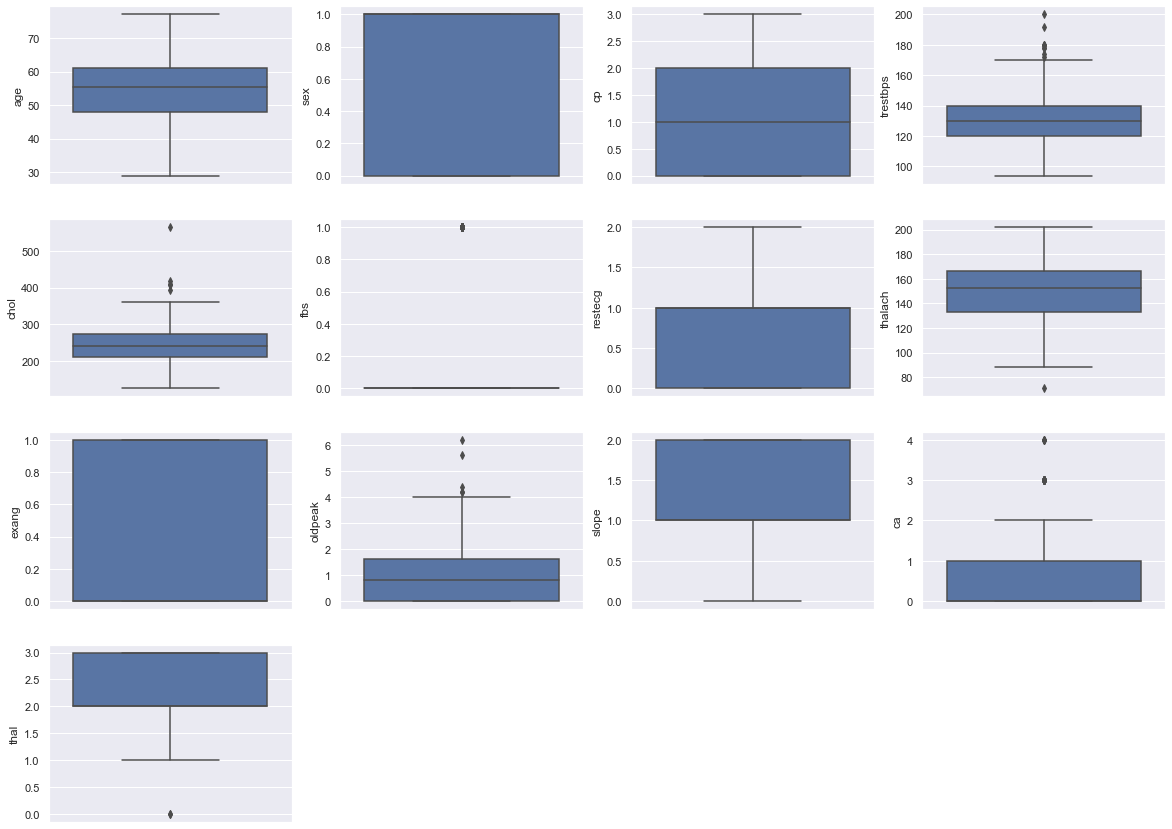

In [20]:
fig = plt.figure(figsize=(20,15))
for index,col in enumerate(df.drop('target', axis=1).columns):
    plt.subplot(4,4,index+1)
    sns.boxplot(y = df[col])

Columns chol, ca and thal seem to have outliers. I am not going to remove the outliers because i want our model to see these anomalies as well.

In [21]:
df.std()

age          9.047970
sex          0.466426
cp           1.032044
trestbps    17.563394
chol        51.753489
fbs          0.356686
restecg      0.526027
thalach     22.903527
exang        0.470196
oldpeak      1.161452
slope        0.616274
ca           1.006748
thal         0.613026
target       0.498970
dtype: float64

Features chol, thalach and trestbps have somewhat higher standard deviation than other columns.

<AxesSubplot:>

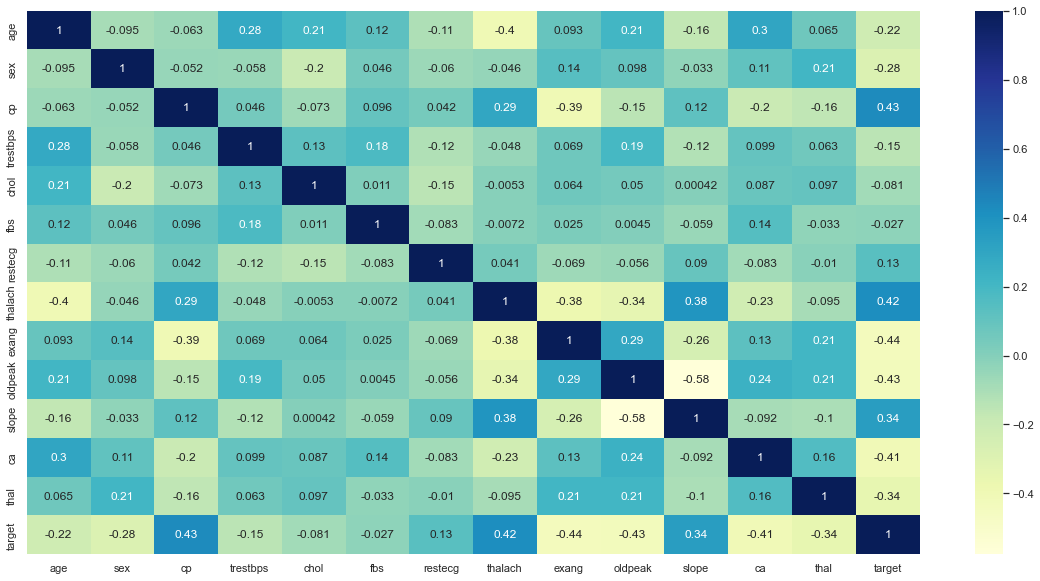

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True , cmap="YlGnBu")

<AxesSubplot:xlabel='target', ylabel='age'>

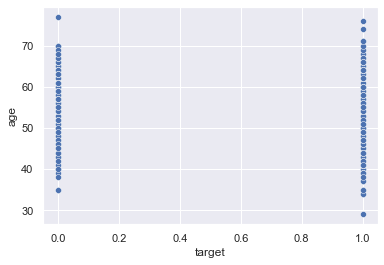

In [23]:
sns.scatterplot(x=df['target'], y=df['age'])

In [24]:
df['age'][df['target']==1].mean() , df['age'][df['target']==1].std()

(52.58536585365854, 9.511957240241179)

In [25]:
df['age'][df['target']==0].mean() , df['age'][df['target']==0].std()

(56.60144927536232, 7.962081537501172)

Age doesn't give much information about the heart attack.

As we saw earlier in boxplot of Resting heart rate there are anomalies present and they are greater than 170 according to the boxplot, lets see if anomalies have any effect on heart diseases.

In [26]:
df[['trestbps','target']][df['trestbps']>170]

,trestbps,target
8,172,1
101,178,1
110,180,1
203,180,0
223,200,0
241,174,0
248,192,0
260,178,0
266,180,0


There seems to be no connection between resting heart rate and heart diseases.

In [28]:
#sns.pairplot(df)

Pairplots are too small and it is not visible properly

In [27]:
df.corrwith(df["target"])

age        -0.221476
sex        -0.283609
cp          0.432080
trestbps   -0.146269
chol       -0.081437
fbs        -0.026826
restecg     0.134874
thalach     0.419955
exang      -0.435601
oldpeak    -0.429146
slope       0.343940
ca         -0.408992
thal       -0.343101
target      1.000000
dtype: float64

The features cp, thalach, exang, oldpeak and ca have strong correlation with the target value.

Cholestrol levels and target variable have a small inverse correlation.

Peak Exercise and target variable have a strong inverse correlation. It means that when the Peak exercise increases the chances of heart disease decreases.


thalassemia is highly correlated with Heart diseases.

fasting blood sugar have very less inverse correlation with Target variable we may have to drop it in feature selection for our ML model.

In [30]:
import statsmodels.api as sm

In [34]:
X_train = df.drop('target', axis=1)
y_train = df['target']

In [35]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.351033
         Iterations 7


In [36]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           12
Date:                Tue, 02 Aug 2022   Pseudo R-squ.:                  0.4908
Time:                        01:13:18   Log-Likelihood:                -106.01
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 4.033e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0156      0.019      0.811      0.417      -0.022       0.053
sex           -1.6352      0.451     -3.622      0.000      -2.520      -0.750
cp             0.8357      0.184      4.535      0.0

We see that we get a Pseudo R-squared of 0.49 which means the model explains 49% of the target variable.
Features sex, cp, exang, ca and thal have high coefficient values, it is the measurement of how change in that variable affects the independent variable.
Features trestbps, age, chol, fbs and thalach are having low coefficient values, we may have to remove some of them taking into account the result of correlation analysis, standard error and p value.
Features age, trestbps, chol and thalach have low standard deviation of coefficient which is not looking too good.
Six Features are greater than the conventional limit of 0.05 for p-values. 
We will eliminate the feature chol, fbs on basis of correlation analysis, coefficient value and p-value.
We can also eliminate other features but for now we use them.

In [39]:
X_train_fs = X_train.drop(['chol','fbs'], axis=1)
X_train_fs.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,0,150,0,2.3,0,0,1
1,37,1,2,130,1,187,0,3.5,0,0,2
2,41,0,1,130,0,172,0,1.4,2,0,2
3,56,1,1,120,1,178,0,0.8,2,0,2
4,57,0,0,120,1,163,1,0.6,2,0,2


In [83]:
import warnings
warnings.filterwarnings("ignore")

### Logistic Regression

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [84]:
lr = LogisticRegression()

In [85]:
params = {'penalty' : ['none', 'l2'],
         'C' : [10, 1.0, 0.1,0.01]
         }

In [86]:
clf = GridSearchCV(lr, params, scoring ='accuracy' , n_jobs = -1, error_score=0)
clf.fit(X_train_fs, y_train)

GridSearchCV(error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 1.0, 0.1, 0.01], 'penalty': ['none', 'l2']},
             scoring='accuracy')

In [87]:
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.847596 using {'C': 0.1, 'penalty': 'l2'}
0.830984 (0.041813) with: {'C': 10, 'penalty': 'none'}
0.830929 (0.044488) with: {'C': 10, 'penalty': 'l2'}
0.830984 (0.041813) with: {'C': 1.0, 'penalty': 'none'}
0.834262 (0.045162) with: {'C': 1.0, 'penalty': 'l2'}
0.830984 (0.041813) with: {'C': 0.1, 'penalty': 'none'}
0.847596 (0.064467) with: {'C': 0.1, 'penalty': 'l2'}
0.830984 (0.041813) with: {'C': 0.01, 'penalty': 'none'}
0.771311 (0.064119) with: {'C': 0.01, 'penalty': 'l2'}


### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
RF = RandomForestClassifier()

In [102]:
params = params = {'n_estimators' : [100,1000,5000],
         'max_features' : [1,3,5,7]
         }

In [100]:
clf = GridSearchCV(RF, params, scoring ='accuracy' , n_jobs = -1, error_score=0)
clf.fit(X_train_fs, y_train)

GridSearchCV(error_score=0, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [1, 3, 5, 7, 9],
                         'n_estimators': [100, 1000, 5000]},
             scoring='accuracy')

In [101]:
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.837650 using {'max_features': 1, 'n_estimators': 1000}
0.834262 (0.033709) with: {'max_features': 1, 'n_estimators': 100}
0.837650 (0.037053) with: {'max_features': 1, 'n_estimators': 1000}
0.834317 (0.036538) with: {'max_features': 1, 'n_estimators': 5000}
0.807596 (0.052991) with: {'max_features': 3, 'n_estimators': 100}
0.817705 (0.039831) with: {'max_features': 3, 'n_estimators': 1000}
0.820929 (0.042137) with: {'max_features': 3, 'n_estimators': 5000}
0.794426 (0.050674) with: {'max_features': 5, 'n_estimators': 100}
0.807705 (0.044803) with: {'max_features': 5, 'n_estimators': 1000}
0.804317 (0.047269) with: {'max_features': 5, 'n_estimators': 5000}
0.794426 (0.049565) with: {'max_features': 7, 'n_estimators': 100}
0.787760 (0.059667) with: {'max_features': 7, 'n_estimators': 1000}
0.791038 (0.055153) with: {'max_features': 7, 'n_estimators': 5000}
0.804317 (0.062313) with: {'max_features': 9, 'n_estimators': 100}
0.791038 (0.052044) with: {'max_features': 9, 'n_estimator

### KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier()

In [112]:
params = params = {'n_neighbors' : [1,3,5,7]
         }

In [113]:
clf = GridSearchCV(knn, params, scoring ='accuracy' , n_jobs = -1, error_score=0)
clf.fit(X_train_fs, y_train)

GridSearchCV(error_score=0, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5, 7]}, scoring='accuracy')

In [114]:
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.642568 using {'n_neighbors': 3}
0.592951 (0.035840) with: {'n_neighbors': 1}
0.642568 (0.028318) with: {'n_neighbors': 3}
0.632787 (0.048925) with: {'n_neighbors': 5}
0.635847 (0.054281) with: {'n_neighbors': 7}


### Naive bayes

In [115]:
from sklearn.naive_bayes import GaussianNB

In [116]:
nb = GaussianNB()

In [121]:
from sklearn.model_selection import cross_val_score

In [130]:
np.mean((cross_val_score(nb, X_train_fs, y_train, cv=5)))

0.8177049180327869

### Support Vector Classifier

In [133]:
from sklearn.svm import SVC

In [134]:
svc = SVC()

In [135]:
params = params = {'kernel' : ['linear','poly', 'rbf', 'sigmoid'],
         'C' : [50,10,1.0,0.1,0.01]
         }

In [136]:
clf = GridSearchCV(svc, params, scoring ='accuracy' , n_jobs = -1, error_score=0)
clf.fit(X_train_fs, y_train)

GridSearchCV(error_score=0, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [137]:
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.834426 using {'C': 0.1, 'kernel': 'linear'}
0.831038 (0.048796) with: {'C': 50, 'kernel': 'linear'}
0.787869 (0.053786) with: {'C': 50, 'kernel': 'poly'}
0.758142 (0.065864) with: {'C': 50, 'kernel': 'rbf'}
0.642295 (0.070367) with: {'C': 50, 'kernel': 'sigmoid'}
0.831148 (0.052616) with: {'C': 10, 'kernel': 'linear'}
0.741694 (0.035926) with: {'C': 10, 'kernel': 'poly'}
0.705355 (0.043240) with: {'C': 10, 'kernel': 'rbf'}
0.645519 (0.081692) with: {'C': 10, 'kernel': 'sigmoid'}
0.821148 (0.038468) with: {'C': 1.0, 'kernel': 'linear'}
0.702186 (0.041794) with: {'C': 1.0, 'kernel': 'poly'}
0.675628 (0.045433) with: {'C': 1.0, 'kernel': 'rbf'}
0.566230 (0.011759) with: {'C': 1.0, 'kernel': 'sigmoid'}
0.834426 (0.047985) with: {'C': 0.1, 'kernel': 'linear'}
0.675519 (0.012482) with: {'C': 0.1, 'kernel': 'poly'}
0.543060 (0.006318) with: {'C': 0.1, 'kernel': 'rbf'}
0.543060 (0.006318) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.804481 (0.044544) with: {'C': 0.01, 'kernel': 'linear'}
0.

### XGBoost

In [155]:
import xgboost as xgb

In [139]:
xgb_model = xgb.XGBClassifier()

In [140]:
params = {'learning_rate' : [0.001, 0.01, 0.1],
         'max_depth' : [3,5,7,9],
          'sub_sample' : [0.5,0.7,1.0],
          'n_estimators' : [100, 1000, 2000]
         }

In [141]:
clf = GridSearchCV(xgb_model, params, scoring ='accuracy' , n_jobs = -1, error_score=0)
clf.fit(X_train_fs, y_train)

[14:00:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:00:09] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(error_score=0,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_wei

In [142]:
print("Best: %f using %s" % (clf.best_score_, clf.best_params_))
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.817760 using {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'sub_sample': 0.5}
0.817760 (0.036986) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'sub_sample': 0.5}
0.817760 (0.036986) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'sub_sample': 0.7}
0.817760 (0.036986) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'sub_sample': 1.0}
0.814426 (0.043175) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'sub_sample': 0.5}
0.814426 (0.043175) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'sub_sample': 0.7}
0.814426 (0.043175) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'sub_sample': 1.0}
0.811148 (0.040448) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 2000, 'sub_sample': 0.5}
0.811148 (0.040448) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 2000, 'sub_sample': 0.7}
0.811148 (0.040448) with: {'learning_

We will now use the best parameters we found using gridsearch for various Algorithms then we will use a hard voting classifier to combine the Models predictions and use it as our final model.

In [146]:
from sklearn.model_selection import train_test_split


X_train_0,X_test,Y_train,Y_test = train_test_split(X_train_fs,y_train,test_size=0.20,random_state=0)

In [161]:
estimator = []

In [162]:
estimator.append(('LR', 
                  LogisticRegression(C = 0.1, penalty = 'l2')))

In [163]:
estimator.append(('RF', 
                  RandomForestClassifier(max_features=1, n_estimators=1000)))

In [164]:
estimator.append(('KNN', 
                  KNeighborsClassifier(n_neighbors=3)))

In [165]:
estimator.append(('NB', 
                  GaussianNB()))

In [153]:
estimator.append(('SVC', 
                  SVC(C=0.1, kernel='linear')))

SVC(C=0.1, kernel='linear')

In [166]:
estimator.append(('xgb_model', 
                  xgb.XGBClassifier(learning_rate=0.001, max_depth=3, n_estimators=100, sub_sample=0.5)))

In [167]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [168]:
vot_hard = VotingClassifier(estimators = estimator , voting ='hard')
vot_hard.fit(X_train_0, Y_train)
y_pred = vot_hard.predict(X_test)

[15:14:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:14:00] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [177]:
score = accuracy_score(Y_test, y_pred)
print("Hard Voting Score", score)

Hard Voting Score 0.9180327868852459


We get an accuracy of 91.8% which is better than any individual model.